# Miniprojeto Grupo Turing Limpeza de Dados e Análise de Dados

## Importando data set e bibliotecas

In [932]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [933]:
df = pd.read_csv("spotify.csv")

## Visão geral dos dados

In [934]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        18835 non-null  int64  
 1   song_name         18835 non-null  object 
 2   song_popularity   18835 non-null  object 
 3   song_duration_ms  18835 non-null  object 
 4   acousticness      18835 non-null  object 
 5   danceability      18835 non-null  object 
 6   energy            18835 non-null  object 
 7   instrumentalness  18835 non-null  object 
 8   key               18835 non-null  float64
 9   liveness          18835 non-null  object 
 10  loudness          18835 non-null  object 
 11  audio_mode        18835 non-null  object 
 12  speechiness       18835 non-null  object 
 13  tempo             18835 non-null  object 
 14  time_signature    18835 non-null  object 
 15  audio_valence     18834 non-null  float64
dtypes: float64(2), int64(1), object(13)
memo

In [935]:
df.head(15)

,Unnamed: 0,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
5,5,Bring Me To Life,80,235893,0.00895kg,0.316mol/L,0.945,1.85e-06,4.0,0.396,-3.169,0,0.124,189.931,4,0.320
6,6,Last Resort,81,199893,0.000504kg,0.581mol/L,0.887,0.00111,4.0,0.268,-3.659,0,0.0624,90.578,4,0.724
7,7,Are You Gonna Be My Girl,76,213800,0.00148kg,0.613mol/L,0.953,0.000582,2.0,0.152,-3.435,1,0.0855,105.046,4,0.537
8,8,Mr. Brightside,80,222586,0.00108kg,0.33mol/L,0.936,0.0,1.0,0.0926,-3.66,1,0.0917,148.112,4,0.234
9,9,Sex on Fire,81,203346,0.00172kg,0.542mol/L,0.905,0.0104,9.0,0.136,-5.653,1,0.054000000000000006,153.398,4,0.374


**Conclusões imediatas:**
* Não temos muitas colunas com dados em branco;
* Podemos usar a coluna `Unnamed: 0` para indexar nosso dataset;
* Temos muitas colunas que aparentemente representam valores númericos mas são categóricas.
* Uma das colunas é a duração da música em milisegundos. Podemos converter essa coluna para uma escala mais natural no que concerna à duração de músicas, no caso, minutos

In [936]:
df = pd.read_csv("spotify.csv", index_col = "Unnamed: 0")

## Categóricos

### Convertendo dados que são categóricos para categóricos

A coluna `key` é categórico e está com o tipo _float64_

In [937]:
df["key"] = df["key"].astype("object");

Vamos usar describe para entender melhor a questão dos dados categóricos serem aparentemente numéricos.

In [938]:
df.describe(include = ["object"])

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature
count,18835,18835,18835,18835,18835,18835,18835,18835.0,18835,18835,18835,18835,18835,18835
unique,13070,102,11771,3210,850,1134,3927,13.0,1427,8418,4,1226,12113,8
top,Better,58,165000,0.13kg,0.687mol/L,0.7040000000000001,0.0,0.0,0.108,-4.589,1,0.0337,125.978,4
freq,21,404,25,45,73,62,7149,2182.0,219,24,11830,66,20,17751


**Conclusões imediatas:**
* Temos músicas com nome repetido (veja a música `Better` por exemplo);
* Além das colunas `audio_mode`, `time_signature`, `key` e `song_name`, todos as colunas representam dados numéricos.

### Removendo músicas com todos os dados iguais (repetidas)

Confira abaixo as músicas com nome Better duas delas são idênticas. Devemos focar em apagar as linhas repetidas, i.e. músicas cujos dados são totalmente identicos.

In [939]:
df[df["song_name"] == "Better"].head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1524,Better,64,201250,0.581kg,0.597mol/L,0.425,0.0,2,0.1,-5.513,1,0.0295,119.998,4,0.309
3151,Better,95,229412,0.0984kg,0.442mol/L,0.585,0.391,0,0.14,-10.332,0,0.0964,97.565,4,0.116
7182,Better,78,229412,0.086kg,0.6829999999999999mol/L,0.562,0.279,0,0.12,-10.315,0,0.0605,98.027,4,0.149
7571,Better,44,229320,0.102kg,0.695mol/L,0.586,0.317,0,0.113,-10.315,0,0.0658,98.035,4,0.112
7626,Better,44,229320,0.102kg,0.695mol/L,0.586,0.317,0,0.113,-10.315,0,0.0658,98.035,4,0.112


Segue o número de linhas duplicadas

In [940]:
duplicadas = df.duplicated()
df[duplicadas].shape[0]

3903

Esse número é um pouco revelador. Ele nos diz que aproximadamente 4000 das entries dos dados tem dados duplicados. E o que faremos é manter apenas uma linha das duplicadas.

In [941]:
df.drop_duplicates(inplace = True)

### Analisando se os inputs categóricos fazem sentido

É importante analisar se os categóricos reais tem inputs que fazem sentido

In [942]:
print("Audio Mode:", df.audio_mode.unique())
print("Time Signature:", df.time_signature.unique())
print("Key:", df.key.unique())

Audio Mode: ['1' '0' '0.105' 'nao_sei']
Time Signature: ['4' '3' '1' '5' '2800000000' 'nao_sei' '0.7' '0']
Key: [8.0 3.0 0.0 10.0 4.0 2.0 1.0 9.0 7.0 11.0 5.0 6.0 0.177]


Algumas _entries_ não fazem sentido. Exemplos:
* Audio Mode: `0.105`, `nao_sei`;
* Time Signature: `2800000000`, `nao_sei`, `0`.
* Key: `0.177`.

Os categóricos falsos (numéricos) podem ter dados que não fazem sentido também mas iremos analisar isso depois

### Trocando os dados categóricos que não fazem sentido

In [943]:
# Substitui "nao_sei" e "0.105" por NaN.
df["audio_mode"].replace(["nao_sei", "0.105"], np.NaN, inplace=True)

# Substitui "2800000000","nao_sei", "0" e "0.7" por NaN.
df["time_signature"].replace(["2800000000", "nao_sei", "0", "0.7"], np.NaN, inplace=True)

# Substitui "0.177" por NaN.
df["key"].replace([0.177], np.NaN, inplace=True)

### Conversões

Converter alguns categóricos representados por números para as informações que eles representam de fato

In [944]:
df.loc[df[df["audio_mode"] == "1"].index, "audio_mode"] = "Major"
df.loc[df[df["audio_mode"] == "0"].index, "audio_mode"] = "Minor"

### Plots

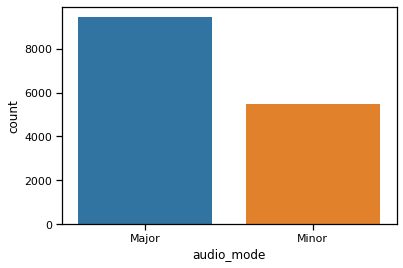

In [945]:
sns.countplot(df["audio_mode"])
plt.show()

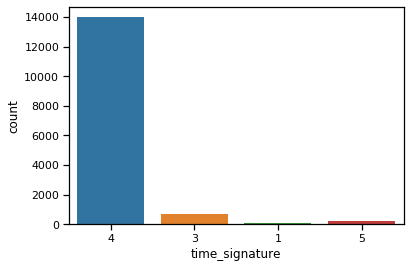

In [946]:
sns.countplot(df["time_signature"])
plt.show()

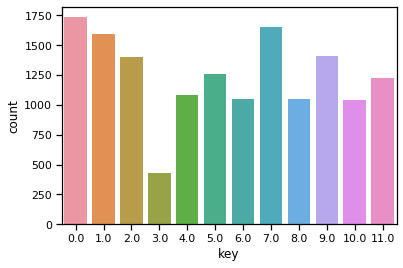

In [947]:
sns.countplot(df["key"])
plt.show()

## Numéricos

### Trocando os dados numéricos que não fazem sentido

In [948]:
# Substitui "nao_sei" por NaN.
df.replace(["nao_sei"], np.NaN, inplace=True)

# Substitui "0.nao_sei" por NaN.

df["speechiness"].replace(["0.nao_sei"], np.NaN, inplace=True)

### Convertendo

Primeiramente vamos retirar os caracteres das colunas que têm caracteres

In [949]:
df["acousticness"] = df["acousticness"].str.replace(r'[^0-9 | \.]+', '')
df["danceability"] = df["danceability"].str.replace(r'[^0-9 | \.]+', '')
df["song_duration_ms"] = df["song_duration_ms"].str.replace(r'[^0-9 | \.]+', '');

Agora vamos converter os dados falsos categóricos para numéricos de todas as colunas nas quais isso deve ser feito

In [950]:
df["acousticness"] = pd.to_numeric(df.acousticness)
df["danceability"] = pd.to_numeric(df.danceability)
df["song_popularity"] = pd.to_numeric(df.song_popularity)
df["song_duration_ms"] = pd.to_numeric(df.song_duration_ms)
df["energy"] = pd.to_numeric(df.energy)
df["instrumentalness"] = pd.to_numeric(df.instrumentalness)
df["liveness"] = pd.to_numeric(df.liveness)
df["loudness"] = pd.to_numeric(df.loudness)
df["speechiness"] = pd.to_numeric(df.speechiness)
df["tempo"] = pd.to_numeric(df.tempo)
df["loudness"] = pd.to_numeric(df.loudness)

In [951]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14932 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         14932 non-null  object 
 1   song_popularity   14931 non-null  float64
 2   song_duration_ms  14932 non-null  float64
 3   acousticness      14932 non-null  float64
 4   danceability      14932 non-null  float64
 5   energy            14931 non-null  float64
 6   instrumentalness  14930 non-null  float64
 7   key               14931 non-null  float64
 8   liveness          14928 non-null  float64
 9   loudness          14931 non-null  float64
 10  audio_mode        14930 non-null  object 
 11  speechiness       14931 non-null  float64
 12  tempo             14931 non-null  float64
 13  time_signature    14926 non-null  object 
 14  audio_valence     14931 non-null  float64
dtypes: float64(12), object(3)
memory usage: 2.4+ MB


Devemos lembrar de uma observação que fizemos no início da análise quanto a escala para medir a duração das músicas.

In [952]:
df["song_duration_min"] = df["song_duration_ms"]/(60*1000)
df.drop(columns = "song_duration_ms")

,song_name,song_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_min
0,Boulevard of Broken Dreams,73.0,0.005520,0.496,0.682,0.000029,8.0,0.0589,-4.095,Major,0.0294,167.060,4,0.474,4.372217
1,In The End,66.0,0.010300,0.542,0.853,0.000000,3.0,0.1080,-6.407,Minor,0.0498,105.256,4,0.370,3.615550
2,Seven Nation Army,76.0,0.008170,0.737,0.463,0.447000,0.0,0.2550,-7.828,Major,0.0792,123.881,4,0.324,3.862217
3,By The Way,74.0,0.026400,0.451,0.970,0.003550,0.0,0.1020,-4.938,Major,0.1070,122.444,4,0.198,3.615550
4,How You Remind Me,56.0,0.000954,0.447,0.766,0.000000,10.0,0.1130,-5.065,Major,0.0313,172.011,4,0.574,3.730433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60.0,0.893000,0.500,0.151,0.000065,11.0,0.1110,-16.107,Major,0.0348,113.969,4,0.300,2.660750
18831,Answers,60.0,0.765000,0.495,0.161,0.000001,11.0,0.1050,-14.078,Minor,0.0301,94.286,4,0.265,3.427767
18832,Sudden Love (Acoustic),23.0,0.847000,0.719,0.325,0.000000,0.0,0.1250,-12.222,Major,0.0355,130.534,4,0.286,3.036850
18833,Gentle on My Mind,55.0,0.945000,0.488,0.326,0.015700,3.0,0.1190,-12.020,Major,0.0328,106.063,4,0.323,5.871333


Agora todos os dados estão com o _type_ e unidade certa.

In [953]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,14931.0,4.875769e+01,2.037962e+01,0.000000,37.000000,52.000000,64.000000,1.000000e+02
song_duration_ms,14932.0,1.241105e+09,1.516320e+11,0.822000,183937.250000,211851.000000,244734.500000,1.852891e+13
acousticness,14932.0,3.891891e-01,2.485970e+00,0.000100,0.028800,0.156000,0.500000,2.050000e+02
danceability,14932.0,6.244974e-01,1.581066e-01,0.000000,0.524000,0.636000,0.740000,9.870000e-01
energy,14931.0,6.397388e-01,2.218052e-01,0.000000,0.496000,0.672000,0.818000,9.990000e-01
instrumentalness,14930.0,9.271190e-02,2.537282e-01,0.000000,0.000000,0.000021,0.005105,1.000000e+01
key,14931.0,5.300985e+00,3.593227e+00,0.000000,2.000000,5.000000,8.000000,1.100000e+01
liveness,14928.0,1.798338e-01,1.618230e-01,-8.575000,0.093000,0.122000,0.224000,9.860000e-01
loudness,14931.0,-7.677231e+00,4.019962e+00,-38.768000,-9.390000,-6.750000,-4.990000,1.585000e+00
speechiness,14931.0,1.059439e-01,8.031547e-01,0.000000,0.037200,0.054100,0.113000,9.742000e+01


### Analise do range das _features_

Algumas _features_ numéricas do data frame têm um range pré-determinada. É o caso da `acousticness`, por exemplo, que deve assumir apenas valores entre 0 e 1. Contudo, podemos ver na tabela acima que nem todas as features estão com valores dentro da range (a própria `acousticness` não está).

**vizualisando as features com dados fora do range**

In [954]:
print("Número de entries em acousticness fora do range: ", df[df["acousticness"] > 1]["acousticness"].shape[0])

Número de entries em acousticness fora do range:  306


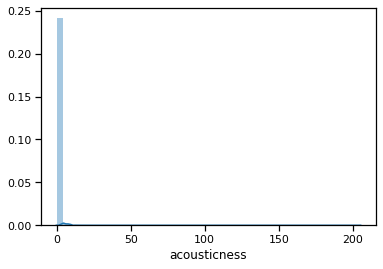

In [955]:
sns.distplot(df["acousticness"])

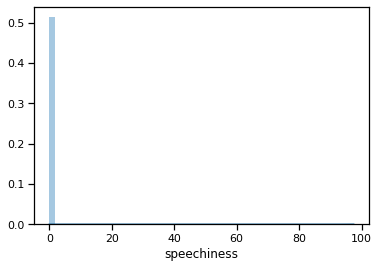

In [956]:
sns.distplot(df["speechiness"])

Em `acousticness` percebe-se um número razoável de dados fora da _range_ , mas ainda bem menor que o número de músicas (duas ordens de grandeza menor), tanto que tais dados não criam elevação alguma na distribuição; em `speechiness` existe apenas um outlier.
Tendo em mente o número baixo de outliers não há problemas em trocar os dados fora da _range_ por NaN.

**trocando por NaN**

In [957]:
# Substitui valores maiores que 1 por NaN.

df.loc[df[df["acousticness"] > 1].index,"acousticness"] = np.NaN

# Substitui valores maiores que 1 por NaN.

df.loc[df[df["speechiness"] > 1].index,"speechiness"] = np.NaN

**plotando novamente sem outliers**

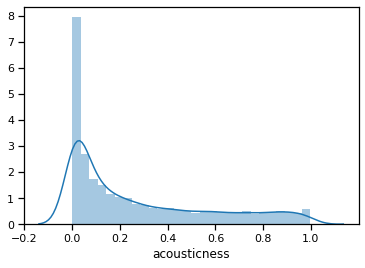

In [958]:
sns.distplot(df["acousticness"].dropna())

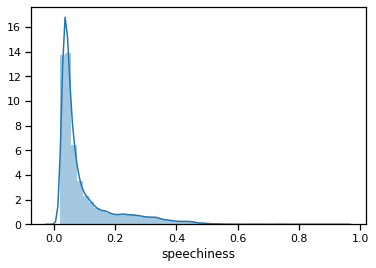

In [959]:
sns.distplot(df["speechiness"].dropna())

**Conclusões imediatas:**
* A maioria dos dados são músicas (como o esperado), pois a grande maioria das tracks tem speechiness menor que 0.33

### Outliers

Podemos ver pela distribuição dos valores que apenas as `song_duration`s continuam tendo outliers depois dos ranges serem ajustados. Vamos conferir mais de perto os outliers das `song_duration`s com um `boxplot`

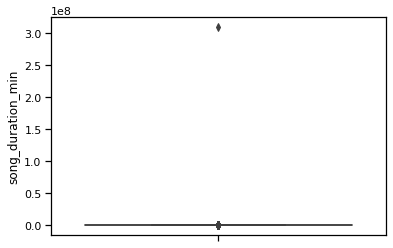

In [960]:
sns.boxplot(y ="song_duration_min", data = df)

Aparentemente só existe um outlier. Podemos retirá-lo e ver se existe algum mais.

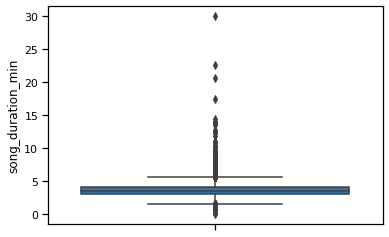

In [961]:
df.loc[df["song_duration_min"] > 1e8, "song_duration_min"] = np.NaN
sns.boxplot(y ="song_duration_min", data = df)

Ainda existem valores que podem atrapalhar a visualização dos dados além de não serem estatisticamente significativos. No caso podemos usar 15 minutos como um limite para uma duração que traga informações representativas das músicas.

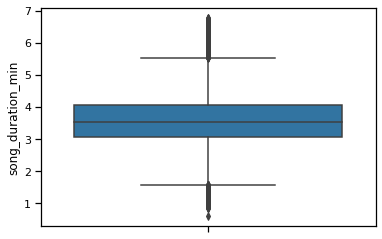

In [962]:
df.loc[(df["song_duration_min"] > (df["song_duration_min"].mean() + 3*df["song_duration_min"].std())) | (df["song_duration_min"] < (df["song_duration_min"].mean() - 3*df["song_duration_min"].std())), "song_duration_min"] = np.NaN
sns.boxplot(y ="song_duration_min", data = df)

Agora, apesar de existirem vários outliers para a margem padrão do boxplot, temos outliers com valores naturais e que trazem informações representativa na população

### Buscando correlações

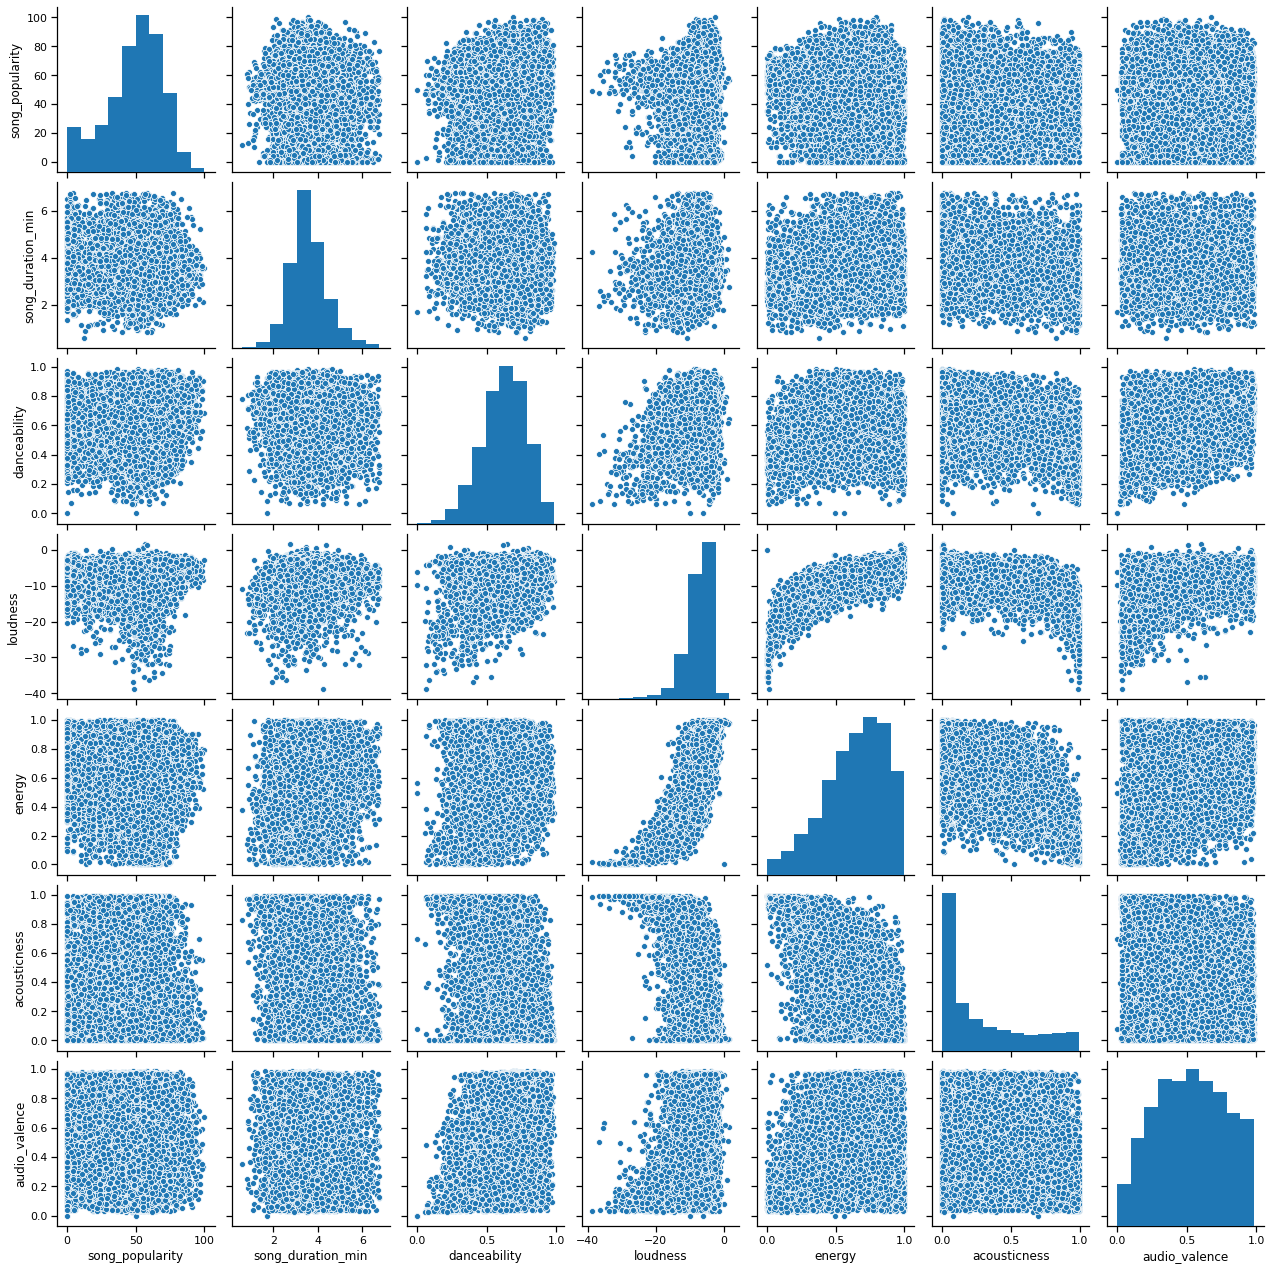

In [963]:
sns.set_context("notebook")
sns.pairplot(df[['song_popularity',
       'song_duration_min', 'danceability', 'loudness', 'energy', 'acousticness', 'audio_valence'
        , 'audio_mode']])
plt.show()

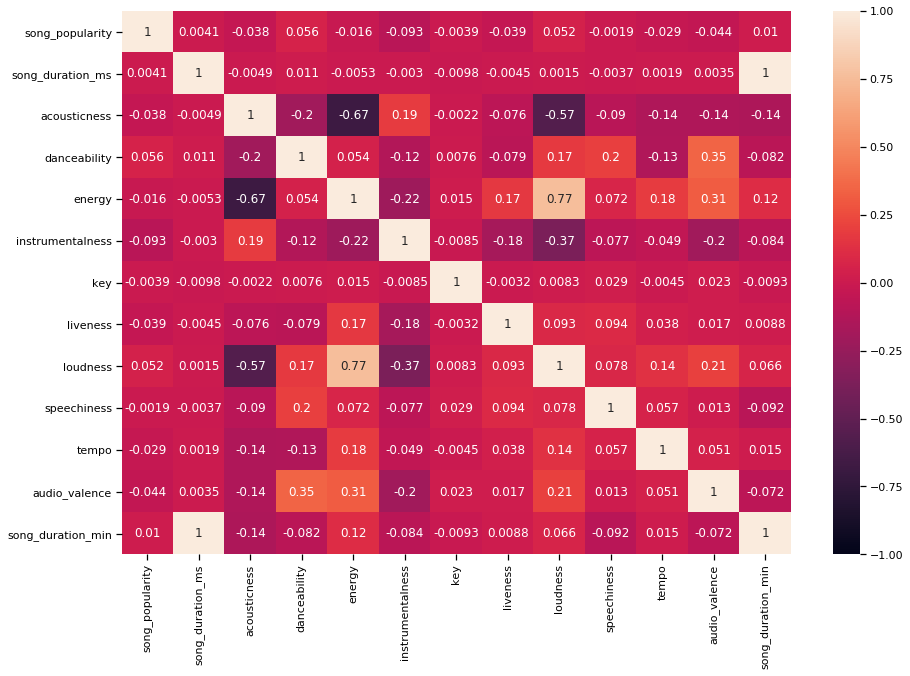

In [964]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

A correlação mais aparente que podemos perceber é a entre volume (`loudness`) e energia (`energy`). Vamos vizualisar melhor essa correlação com uma regreção quadrática:

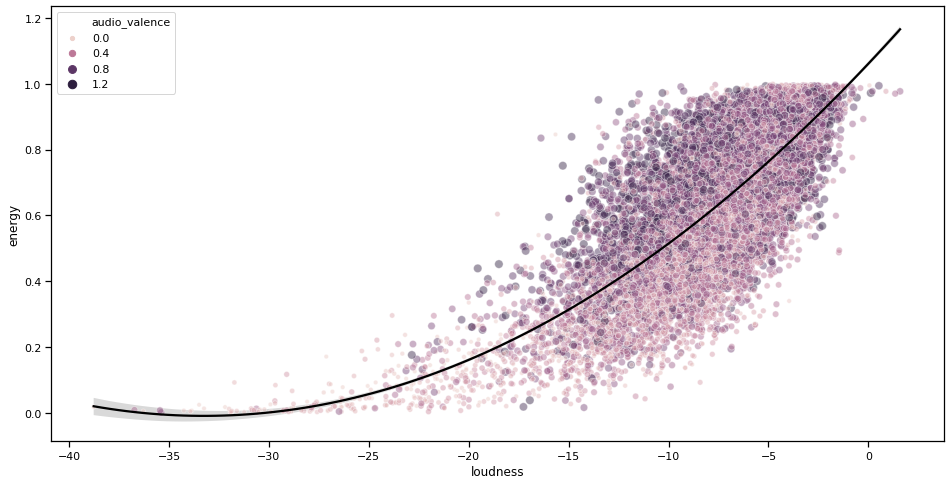

In [965]:
plt.figure(figsize=(16,8))

sns.regplot(x ='loudness', y ='energy', data = df, color = 'k', order = 2,
            scatter = False)
sns.scatterplot(x ='loudness', y ='energy', data = df, alpha = 0.45, hue = 'audio_valence',
                size = 'audio_valence')
plt.show()

Podemos analizar a popularidade de músicas pela duração, pois no pairplot talvez algum padrão não tenha sido percebido. Pela minha intuição, músicas com duração muito maior que 4 minutos devem ter uma popularidade menor pois fogem do tempo padrão de músicas famosas

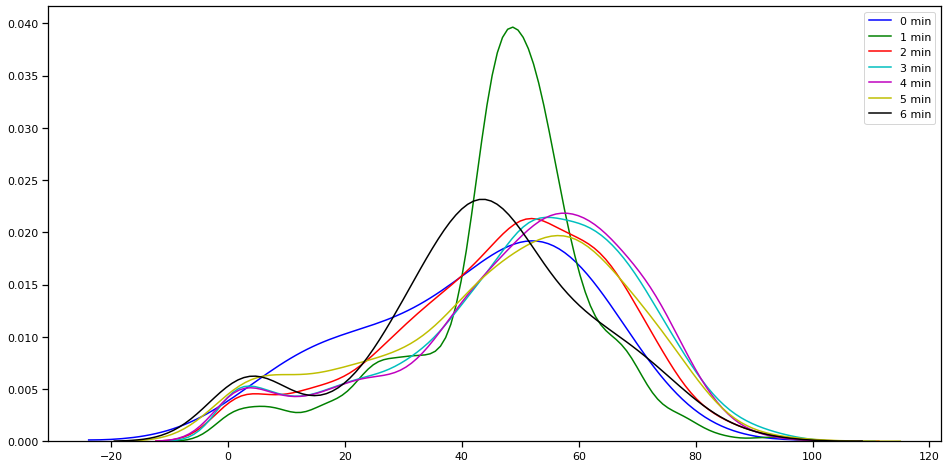

In [970]:
#Cria coluna no data frame com duração das músicas arredondada por minuto
df["rounded_song_duration"] = df["song_duration_min"].dropna().astype("int32")

plt.figure(figsize=(16,8))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'olive']
count = 0;
for i in range(0,7):
    sns.kdeplot(df[df["rounded_song_duration"] == i]["song_popularity"].dropna(),
            color = colors[count], label = str(i)+" min");
    count += 1
plt.show()

O gráfico acima mostra que, na verdade, as distribuições de popularidade são muito parecidas para músicas longas e curtas

Se formos analisar a relação entre tom ou o fato de ser maior ou menor das músicas e a popularidade, percebemos que a tonalidade ou escala maior ou menor também parecem ser irrelevantes como mostrado nos gráficos abaixo

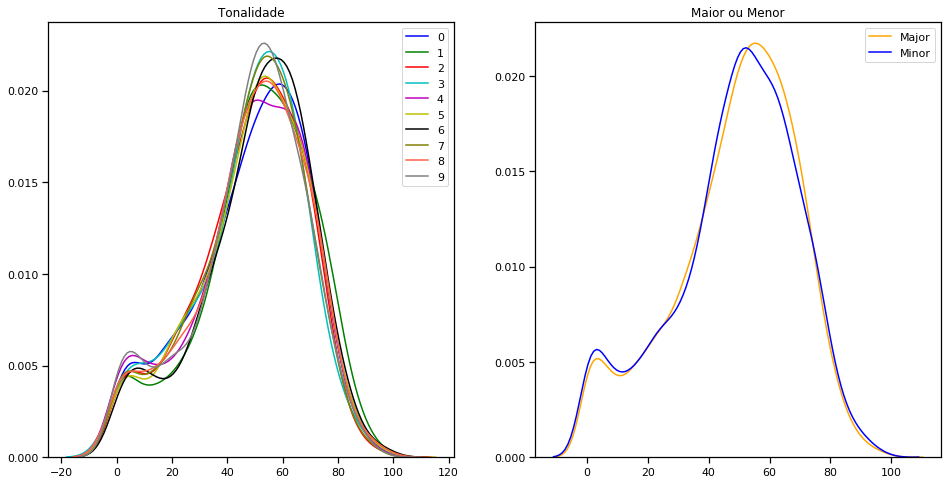

In [967]:
plt.figure(figsize=(16,8))
plt.subplot(121)

#TONALIDADE

plt.title('Tonalidade')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'olive', 'tomato', 'gray', 'saddlebrown']
count = 0;
for i in range(0,10):
    sns.kdeplot(df[df["key"] == i]["song_popularity"].dropna(),
            color = colors[count], label = str(i));
    count += 1
plt.subplot(122)

#MAIOR OU MENOR

plt.title('Maior ou Menor')
sns.kdeplot(df[df["audio_mode"] == "Major"]["song_popularity"].dropna(),
            color = 'orange', label = "Major");
sns.kdeplot(df[df["audio_mode"] == "Minor"]["song_popularity"].dropna(),
            color = 'blue', label = "Minor");

plt.show()